In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "movielens100k.csv"
ratings = load_data(path_dataset)

number of items: 1682, number of users: 943


### Plot the number of ratings per movie and user

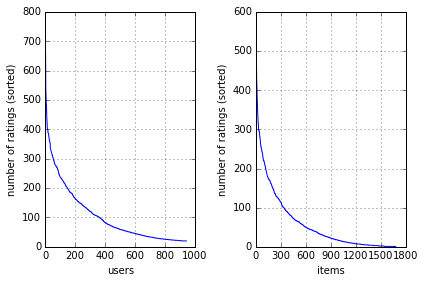

min # of items per user = 20, min # of users per item = 1.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

In [4]:
import math

def split_data(ratings, num_items_per_user, num_users_per_item,
               min_num_ratings, p_test=0.1):
    """split the ratings to training data and test data.
    Args:
        min_num_ratings: 
            all users and items we keep must have at least min_num_ratings per user and per item. 
    """
    # set seed
    np.random.seed(988)
    
    # select user and item based on the condition.
    valid_users = np.where(num_items_per_user >= min_num_ratings)[0]
    valid_items = np.where(num_users_per_item >= min_num_ratings)[0]
    valid_ratings = ratings[valid_items, :][: , valid_users]  
    
    I, J, V = sp.find(valid_ratings)
    
    all_indices = np.arange(I.shape[0])
    print(all_indices)
    test_size = math.ceil(I.shape[0]*p_test)
    np.random.shuffle(all_indices)
    test_indices = all_indices[:test_size]
    train_indices = np.delete(all_indices, test_indices, axis=0)

    I_train = I[train_indices]
    J_train = J[train_indices]
    V_train = V[train_indices]
    
    I_test = I[test_indices]
    J_test = J[test_indices]
    V_test = V[test_indices]
    
    test = sp.lil_matrix(sp.coo_matrix((V_test, (I_test, J_test)), (valid_ratings.shape)))
    train = sp.lil_matrix(sp.coo_matrix((V_train, (I_train, J_train)), (valid_ratings.shape)))

    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data and return train and test data. TODO
    # NOTE: we only consider users and movies that have more
    # than 10 ratings
    # ***************************************************
    print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))
    print("Total number of nonzero elements in valid data:{v}".format(v=valid_ratings.nnz))
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return valid_ratings, train, test

[    0     1     2 ..., 97949 97950 97951]
Total number of nonzero elements in origial data:99999
Total number of nonzero elements in valid data:97952
Total number of nonzero elements in train data:88156
Total number of nonzero elements in test data:9796


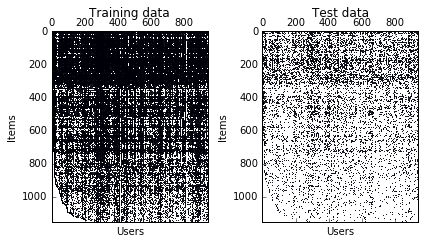

(1152, 943)


In [7]:
from plots import plot_train_test_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)
print(train.shape)

## Implementing Baselines 

### Use the global mean to do the prediction

In [ ]:
from helpers import calculate_mse

def baseline_global_mean(train, test):
    """baseline method: use the global mean."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************    
    raise NotImplementedError

baseline_global_mean(train, test)

### Use the user means as the prediction

In [ ]:
def baseline_user_mean(train, test):
    """baseline method: use the user means as the prediction."""
    mse = 0
    num_items, num_users = train.shape
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    raise NotImplementedError

baseline_user_mean(train, test)

### Use the item means as the prediction

In [ ]:
def baseline_item_mean(train, test):
    """baseline method: use item means as the prediction."""
    mse = 0
    num_items, num_users = train.shape
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    raise NotImplementedError
    
baseline_item_mean(train, test)

### Learn the Matrix Factorization using SGD

#### Initialize matrix factorization

In [5]:
def init_MF(train, num_features):
    """init the parameter for matrix factorization."""
    Z = 5 * np.random.rand(train.shape[1], num_features) 
    W = np.zeros([train.shape[0], num_features])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # you should return:
    #     user_features: shape = num_features, num_user
    #     item_features: shape = num_features, num_item
    # ***************************************************
    return sp.csr_matrix(W), sp.csr_matrix(Z)

Compute the cost by the method of matrix factorization.


In [ ]:
def compute_error(data, user_features, item_features, nz):
    """compute the loss (MSE) of the prediction of nonzero elements."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # calculate rmse (we only consider nonzero entries.)
    # ***************************************************
    raise NotImplementedError

In [66]:
def matrix_factorization_SGD(train, test):
    """matrix factorization by SGD."""
    # define parameters
    gamma = 0.01
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    num_epochs = 20     # number of full passes through the train set
    errors = [0]
    
    # set seed
    np.random.seed(988)

    # init matrix
    user_features, item_features = init_MF(train, num_features)
    
    # find the non-zero ratings indices 
    nz_row, nz_col = train.nonzero()
    nz_train = list(zip(nz_row, nz_col))
    nz_row, nz_col = test.nonzero()
    nz_test = list(zip(nz_row, nz_col))

    print("learn the matrix factorization using SGD...")
    for it in range(num_epochs):        
        # shuffle the training rating indices
        np.random.shuffle(nz_train)
        
        # decrease step size
        gamma /= 1.2
        
        for d, n in nz_train:
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO
        # do matrix factorization.
        # ***************************************************
        raise NotImplementedError

        print("iter: {}, RMSE on training set: {}.".format(it, rmse))
        
        errors.append(rmse)
    # ***************************************************
    # TODO
    # evaluate the test error.
    # ***************************************************
    rmse = compute_error(test, user_features, item_features, nz_test)
    print("RMSE on test data: {}.".format(rmse))
    raise NotImplementedError

matrix_factorization_SGD(train, test)   

IndentationError: expected an indented block (<ipython-input-66-a18082d7808e>, line 39)

### Learn the Matrix Factorization using Alternating Least Squares

NameError: name 'train' is not defined

In [124]:
w, z = init_MF(train, 20)
print(train.shape)
print(A.shape)
print(w.shape)
print(A_i.shape)
print(A_i.dot(z))

(1152, 943)
(1152, 943)
(1152, 20)
(943, 943)
  (0, 19)	0.536650061692
  (0, 18)	2.20461477941
  (0, 17)	3.94792472674
  (0, 16)	4.28601049707
  (0, 15)	4.13148794452
  (0, 14)	1.40426005235
  (0, 13)	2.95956067478
  (0, 12)	4.32902648492
  (0, 11)	4.82765739995
  (0, 10)	3.22809426229
  (0, 9)	4.25281932177
  (0, 8)	2.08924538532
  (0, 7)	1.35935909708
  (0, 6)	2.26627972862
  (0, 5)	2.55109933997
  (0, 4)	4.34820004089
  (0, 3)	0.961471199928
  (0, 2)	4.07779743568
  (0, 1)	0.809578989906
  (0, 0)	3.51000804729
  (4, 19)	3.79766121845
  (4, 18)	2.45658576144
  (4, 17)	3.02802948077
  (4, 16)	0.399655521431
  (4, 15)	0.104760452545
  :	:
  (933, 4)	1.75643283758
  (933, 3)	1.08890728442
  (933, 2)	2.04460521617
  (933, 1)	3.87192681722
  (933, 0)	0.414532583185
  (942, 19)	3.48030266768
  (942, 18)	1.28065124004
  (942, 17)	1.22917407136
  (942, 16)	1.26416644038
  (942, 15)	2.45597135959
  (942, 14)	3.72592780193
  (942, 13)	2.02325155448
  (942, 12)	3.66716047713
  (942, 11)	2.01581

In [8]:
A = sp.csr_matrix(train)
A[A > 0] = 1
def update_user_feature(
        train, item_features, lambda_user,
        user_features, num_features):
    """update user feature matrix."""
    for u in range(train.shape[0]):
        d = A[u]
        dense = d.toarray()[0]
        A_i = sp.diags(dense).tocsr()
        #user_features.tolil()
        user_features[u] = sp.linalg.spsolve(item_features.T.dot(A_i.dot(item_features)) +  lambda_user * 
                                             sp.eye(num_features), item_features.T.dot(A_i.dot(train[u].T)))


def update_item_feature(
        train, user_features, lambda_item,
        item_features, num_features):
    """update item feature matrix."""
    for m in range(train.shape[1]):
        d = A.T[m]
        dense = d.toarray()[0]
        A_i = sp.diags(dense).tocsr()
        #user_features.tolil()
        item_features[m] = sp.linalg.spsolve(user_features.T.dot(A_i.dot(user_features)) +  lambda_item * 
                                             sp.eye(num_features), user_features.T.dot(A_i.dot(train[:,m])))


In [12]:
import scipy.sparse.linalg
def get_error(train, W, Z):
    B = sp.csr_matrix(train)
    error_max = W.dot(Z.T)
    #error = train - error_max
    ctrain = sp.coo_matrix(train)
    error = 0
    n = 0
    for i,j,v in zip(ctrain.row, ctrain.col, ctrain.data):
        error += (v - error_max[i, j]) ** 2
        n += 1
    return error/n
    #print(error[(I_train, J_train)])
    #error = error[train > 0].todense() ** 2

In [11]:
from helpers import build_index_groups


def ALS(train, test):
    """Alternating Least Squares (ALS) algorithm."""
    # define parameters
    num_features = 25   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    stop_criterion = 1e-4
    change = 1
    error_list = [0, 0]
    
    # set seed
    np.random.seed(988)

    # init ALS
    user_features, item_features = init_MF(train, num_features)
    for i in range(9):
        print("Iteration ", i)
        update_user_feature(train, item_features, lambda_user, user_features, num_features)
        update_item_feature(train, user_features, lambda_item, item_features, num_features)

    #print(get_error(train, user_features, item_features, A))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # start you ALS-WR algorithm.
    # ***************************************************
    #raise NotImplementedError
    return user_features, item_features

us, it = ALS(train, test)

Iteration  0


/home/huguenin/anaconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Iteration  1


In [13]:
print(get_error(train, us, it))
print(get_error(test, us, it))

0.46689963195
0.592352609847
